In [45]:
!pip install gensim

In [46]:
import gensim
import gensim.downloader

Part 1: Word Embeddings

In [47]:
# Load pre-trained Word2Vec model trained on wikipedia data
model = gensim.downloader.load("glove-wiki-gigaword-100")

# Getting the vector for a word
dog = model['dog']

# Getting the most similar words
print(model.most_similar('dog'))

# Getting the similarity between two words
print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [48]:
#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [49]:
word = 'science'
similar_words = model.most_similar(word)

print(f"Most similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity}")

Most similar words to 'science':
sciences: 0.8073161244392395
physics: 0.7914697527885437
institute: 0.7663252353668213
mathematics: 0.7607672810554504
studies: 0.7590447068214417
research: 0.7585293650627136
biology: 0.7382515668869019
university: 0.7314533591270447
psychology: 0.7279348969459534
economics: 0.7270671129226685


The above line of code I used was with the assistance of Copilot.

In [50]:
word = 'university'
similar_words = model.most_similar(word)

print(f"Most similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity}")

Most similar words to 'university':
college: 0.8294212818145752
harvard: 0.8156032562255859
yale: 0.8113802075386047
professor: 0.8103784918785095
graduate: 0.7993001341819763
faculty: 0.7793422937393188
princeton: 0.762718141078949
institute: 0.7604438662528992
school: 0.7548453211784363
stanford: 0.7424824833869934


The above line of code was used with the assistance of copilot. I wasn't sure if one was enough, so I included two different variations.

In [51]:
#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [52]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"
gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)

[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [53]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [54]:
dimension_index = 0

words_to_modify = ['doctor', 'nurse', 'teacher', 'engineer', 'scientist']

modified_embeddings = {}
for word in words_to_modify:
    original_embedding = model[word]
    modified_embedding = original_embedding.copy()
    modified_embedding[dimension_index] += original_embedding[dimension_index]
    modified_embeddings[word] = modified_embedding

for word, embedding in modified_embeddings.items():
    similar_words = model.similar_by_vector(embedding)
    print(f"Most similar words to modified '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Most similar words to modified 'doctor':
doctor: 0.9999681711196899
physician: 0.7667373418807983
nurse: 0.7518564462661743
dr.: 0.7167025804519653
doctors: 0.7081695199012756
patient: 0.7070759534835815
medical: 0.6996188759803772
hospital: 0.689971923828125
surgeon: 0.6890944242477417
psychiatrist: 0.6585639715194702

Most similar words to modified 'nurse':
nurse: 0.9996103048324585
doctor: 0.7510480284690857
nurses: 0.7370350360870361
physician: 0.6891285181045532
nursing: 0.6849812269210815
dentist: 0.6785371899604797
therapist: 0.6694684624671936
midwife: 0.6675474047660828
hospital: 0.6645215153694153
surgeon: 0.6633015275001526

Most similar words to modified 'teacher':
teacher: 0.996998131275177
student: 0.8119312524795532
school: 0.7571505904197693
teaching: 0.7563098669052124
taught: 0.7422683835029602
teachers: 0.7312586307525635
graduate: 0.7162258625030518
instructor: 0.7038424611091614
students: 0.6851344108581543
teaches: 0.6560587882995605

Most similar words to modifie

The above line of code was used with the assistance of Copilot.

Part 2: Visualization and Embeddings in Space

In [55]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


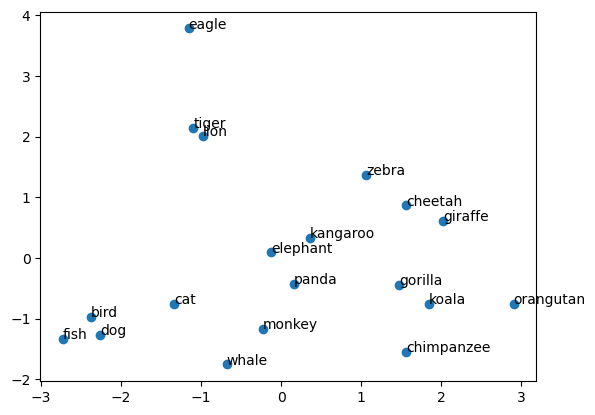

In [56]:
#visualize pca of word embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [57]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

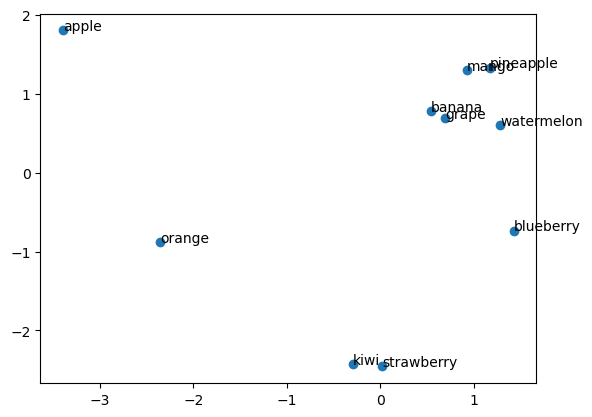

In [58]:
my_words = ["apple", "banana", "orange", "grape", "pineapple", "mango", "strawberry", "blueberry", "watermelon", "kiwi"]

my_X = [model[word] for word in my_words]

my_X_pca = pca.fit_transform(my_X)

plt.scatter(my_X_pca[:, 0], my_X_pca[:, 1])
for i, word in enumerate(my_words):
    plt.annotate(word, (my_X_pca[i, 0], my_X_pca[i, 1]))

plt.show()

The above line of codes was used with the assistance of Copilot.

In [59]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

Part 3: Embedding reddit posts

In [60]:
import pandas as pd

In [61]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [62]:
#using the code from project 1, clean the text and create a bag of words representation of the text

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.lower()
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['cleaned_text'])

print(X_bow)

  (0, 6898)	2
  (0, 14184)	3
  (0, 12363)	1
  (0, 11174)	2
  (0, 1394)	2
  (0, 7482)	1
  (0, 8413)	2
  (0, 6913)	1
  (0, 4502)	1
  (0, 12409)	1
  (0, 15444)	1
  (0, 15511)	1
  (0, 6522)	1
  (0, 14358)	2
  (0, 8399)	1
  (0, 13180)	1
  (0, 9965)	1
  (0, 13668)	1
  (0, 10158)	1
  (0, 15742)	1
  (0, 11649)	1
  (0, 15054)	1
  (0, 10038)	2
  (0, 11994)	1
  (0, 13732)	1
  :	:
  (9448, 4822)	1
  (9448, 2881)	1
  (9448, 7981)	1
  (9448, 8865)	1
  (9449, 1394)	1
  (9449, 7482)	1
  (9449, 15742)	1
  (9449, 11649)	1
  (9449, 1639)	1
  (9449, 1579)	1
  (9449, 7896)	1
  (9449, 9815)	1
  (9449, 1316)	1
  (9449, 13666)	1
  (9449, 1914)	1
  (9449, 21)	2
  (9449, 8605)	1
  (9449, 9729)	1
  (9449, 1581)	1
  (9449, 6632)	1
  (9449, 8639)	1
  (9449, 13204)	1
  (9449, 14218)	1
  (9449, 2023)	1
  (9449, 13547)	1


The above line of code was used with the assistance of Github Copilot

In [64]:
# using the embedding code from last week, plot a pca of all posts in the subreddits data set
# color by the "label" column to see if the two subreddits are separable in the embedding space
# is there a clear separation between the two columns? 

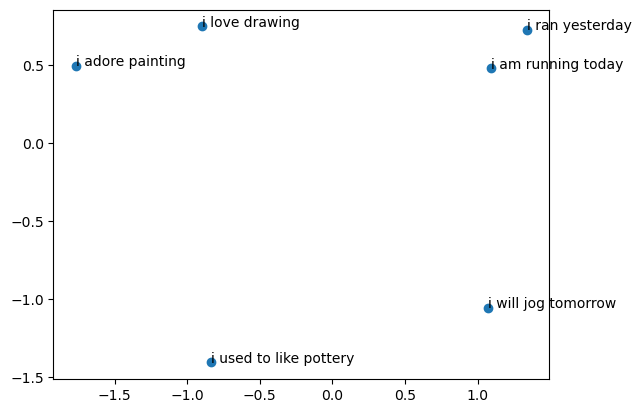

In [65]:
import numpy as np
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]
avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

The above line of code was used with the assistance of Github Copilot

In [66]:
#use this function to calculate the average embedding of each post in the dataset
#plot the pca of the average embeddings, color by the "label" column
#how is this plot different from the previous one?
#is there clear separation? 

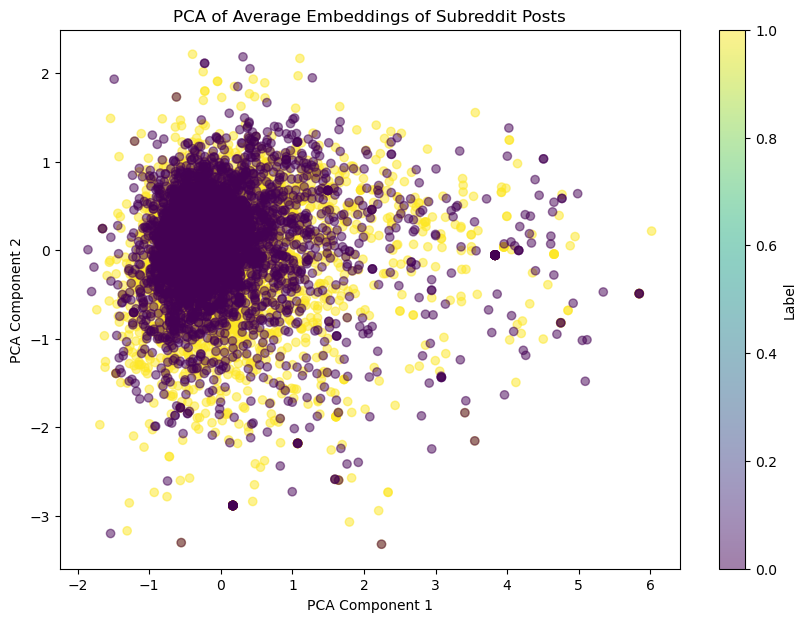

In [78]:
data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

data = data.dropna(subset=['avg_embedding'])

embeddings = np.array(data['avg_embedding'].tolist())
labels = data['label'].values

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Average Embeddings of Subreddit Posts')
plt.show()

The above lines of code are used with the assistance of Github Copilot.

Part 4: HuggingFace and BERT

In [68]:
#Please wait until after next week to start
# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [69]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [70]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [71]:
# Classify the sentiment of all posts in the Reddit dataset
data['sentiment'] = data['text'].apply(lambda x: pipe(x)[0]['label'])

# Report the most common sentiment label
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print(f"The most common sentiment label is: {most_common_sentiment}")

Token indices sequence length is longer than the specified maximum sequence length for this model (302 > 128). Running this sequence through the model will result in indexing errors


The most common sentiment label is: NEU


The above line of code I used was with the assistance of Copilot.

In [72]:
#look at ten sample posts and labels; do you agree with all of them? 

In [77]:
sample_posts = data[['text', 'label']].sample(10)

for index, row in sample_posts.iterrows():
    print(f"Post: {row['text']}")
    print(f"Label: {row['label']}")
    print()

Post: I was told by a Ross student that the Go Blue Guarantee would "lower the standards of admissions for the university and harm property value in the area" like I cannot fathom the level of hatred you have to have toward people in different circumstances than your own to express that.
Label: 0

Post: I just complained to my friends and that’s about it tbh
Label: 0

Post: THIS is the proper response AND best response. Not saying “why can’t we arrest him” like you have never taken a civics class. Just counter protest peacefully in a way that will make them absolutely rage out.
Label: 0

Post: it’s closed bc of labor day
Label: 0

Post: You’re upset that a minscule tiny country is basing an action on religion and yet the rest of the region, 99.9 percent of it, are effectively ethno-religious states and have expelled Jews (and other non Muslims). Where’s your outrage? I used to believe that one could be anti Israel but not anti semitic but I no longer believe that given the selective ou

The above line of code I used was with the assistance of Copilot.

In [74]:
#is the UIUC or Michigan subreddit more negative?

In [76]:
uiuc_negative = data[(data['label'] == 1) & (data['sentiment'] == 'NEG')]
mich_negative = data[(data['label'] == 0) & (data['sentiment'] == 'NEG')]

uiuc_negative_ratio = len(uiuc_negative) / len(data[data['label'] == 1])
mich_negative_ratio = len(mich_negative) / len(data[data['label'] == 0])

print(f"UIUC subreddit negative sentiment ratio: {uiuc_negative_ratio:.2f}")
print(f"Michigan subreddit negative sentiment ratio: {mich_negative_ratio:.2f}")

if uiuc_negative_ratio > mich_negative_ratio:
    print("The UIUC subreddit is more negative.")
elif mich_negative_ratio > uiuc_negative_ratio:
    print("The Michigan subreddit is more negative.")
else:
    print("Both subreddits have the same level of negativity.")

UIUC subreddit negative sentiment ratio: 0.25
Michigan subreddit negative sentiment ratio: 0.26
The Michigan subreddit is more negative.


The above line of code ws used with the assistance of Github Copilot.

Based on the code above, the Michigan subreddit are more negative because the ratio is 0.26, while the UIUC subreddit of negative statement ratio is 0.25. Therefore, the Michigan subreddit is more negative. 